In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
def load_dataset(csv_path):
    try:
        data = pd.read_csv(csv_path)
    except FileNotFoundError:
        print("Error: El archivo no se encontró.")
        return None, None
    except pd.errors.EmptyDataError:
        print("Error: El archivo está vacío.")
        return None, None
    except pd.errors.ParserError:
        print("Error: Error al analizar el archivo.")
        return None, None
    
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y


In [4]:
csv_path = input("Ingrese el path del dataset CSV: ") 
csv_path = f'CSV/{csv_path}'
X, y = load_dataset(csv_path)

if X is None or y is None:
    print("No se pudo cargar el dataset. Saliendo...")
    exit()

_, num_caracteristicas = X.shape

print("Número de características:", num_caracteristicas)

Número de características: 25


Empieza el entrenamiento...
Modelo entrenado


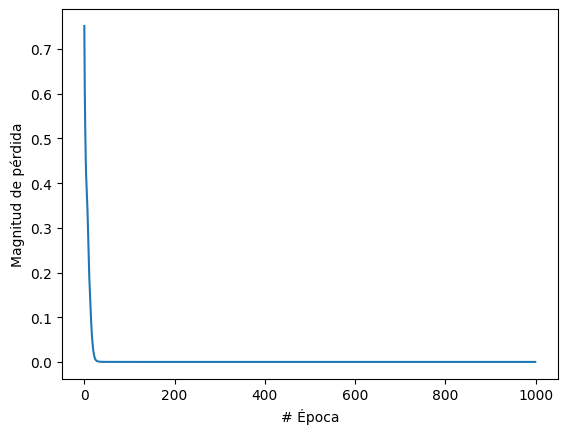

In [7]:
# Definición del modelo con 5 salidas
model = Sequential([
    Dense(units=64, activation='relu', input_shape=[num_caracteristicas]),
    Dense(units=64, activation='relu'),
    # Cambia el número de unidades a 5 para la salida
    # Dense(units=1)
    Dense(units=5, activation='sigmoid')  # Cambia a 2 unidades aquí
    # Dense(units=5, activation='softmax')  # Asegúrate de tener 5 unidades aquí
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    # loss='mean_squared_error',
    loss='binary_crossentropy',  # Usa 'binary_crossentropy' para clasificación binaria
    # loss='categorical_crossentropy',  # Si es clasificación multiclase, usa 'categorical_crossentropy'
    metrics=['accuracy']
)

# Suponiendo que 'y' contiene enteros de clases desde 0 hasta 4
y_one_hot = to_categorical(y, num_classes=5)
# y_one_hot = to_categorical(y, num_classes=2)

# Ahora puedes entrenar el modelo con las etiquetas en formato one-hot
print('Empieza el entrenamiento...')
historial = model.fit(X, y_one_hot, epochs=1000, verbose=False)
# historial = model.fit(X, y, epochs=1000, verbose=False)
print('Modelo entrenado')

plt.xlabel('# Época')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])
plt.show()

In [8]:
# Hacer predicciones
print('Prediccion')
# csv_path = input("Ingrese el path del dataset CSV: ") 
# csv_path = f'CSV/{csv_path}'
csv_path = f'CSV/vocalest.csv'
X_test, y_test = load_dataset(csv_path)

# Suponiendo que 'y' contiene enteros de clases desde 0 hasta 4
y_test_one_hot = to_categorical(y, num_classes=5)

#Predecir
predicciones = model.predict(X_test)

# Convertir las probabilidades en etiquetas de clase
etiquetas_predichas = np.argmax(predicciones, axis=1)

predicciones_one_hot = to_categorical(etiquetas_predichas, num_classes=5)

# Imprimir las predicciones en formato one-hot
for i, prediccion in enumerate(predicciones_one_hot):
    print(f"Entrada: {X_test[i]}, Predicción: {prediccion}, Valor real: {y_test_one_hot[i]} ")

Prediccion
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Entrada: [0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1], Predicción: [1. 0. 0. 0. 0.], Valor real: [1. 0. 0. 0. 0.] 
Entrada: [1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1], Predicción: [0. 1. 0. 0. 0.], Valor real: [0. 1. 0. 0. 0.] 
Entrada: [1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1], Predicción: [0. 0. 1. 0. 0.], Valor real: [0. 0. 1. 0. 0.] 
Entrada: [0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0], Predicción: [0. 0. 0. 1. 0.], Valor real: [0. 0. 0. 1. 0.] 
Entrada: [1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0], Predicción: [0. 0. 0. 0. 1.], Valor real: [0. 0. 0. 0. 1.] 
